In [47]:
import pandas as pd 
china_df = pd.read_csv("data\\China_dataset.csv")
china_df

# # # random 
# df_sample = china_df.sample(n=40000, random_state=42)  # random_state για αναπαραγωγιμότητα
# # # guardar 
# df_sample.to_csv("china_sample.csv", index=False)

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,China,Hou Bay,Bay,11-01-2001,3.500,0.7,8.200000,0.400,8.6,17.0,0.210,0.480,63.683885,Marginal
1,China,Hou Bay,Bay,12-02-2001,6.700,2.1,11.684103,0.720,7.3,18.6,0.130,0.160,58.308811,Marginal
2,China,Hou Bay,Bay,14-03-2001,4.500,0.3,11.684103,0.510,6.8,19.5,0.320,0.650,63.369021,Marginal
3,China,Hou Bay,Bay,17-04-2001,5.400,5.2,11.684103,0.580,7.3,23.6,0.110,0.320,61.183528,Marginal
4,China,Hou Bay,Bay,11-05-2001,3.300,1.7,11.684103,0.490,7.4,27.2,0.280,0.680,62.397020,Marginal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45992,China,Hou Bay,Bay,14-09-2017,0.048,2.0,11.684103,0.015,7.7,28.5,0.072,0.240,93.163163,Good
45993,China,Hou Bay,Bay,14-09-2017,0.055,1.6,6.100000,0.017,7.7,28.3,0.074,0.240,93.166726,Good
45994,China,Hou Bay,Bay,09-11-2017,0.049,0.5,5.800000,0.004,7.9,25.1,0.022,0.077,93.195635,Good
45995,China,Hou Bay,Bay,09-11-2017,0.052,0.5,5.700000,0.012,7.9,25.1,0.023,0.048,93.195635,Good


### EDA con Time Series

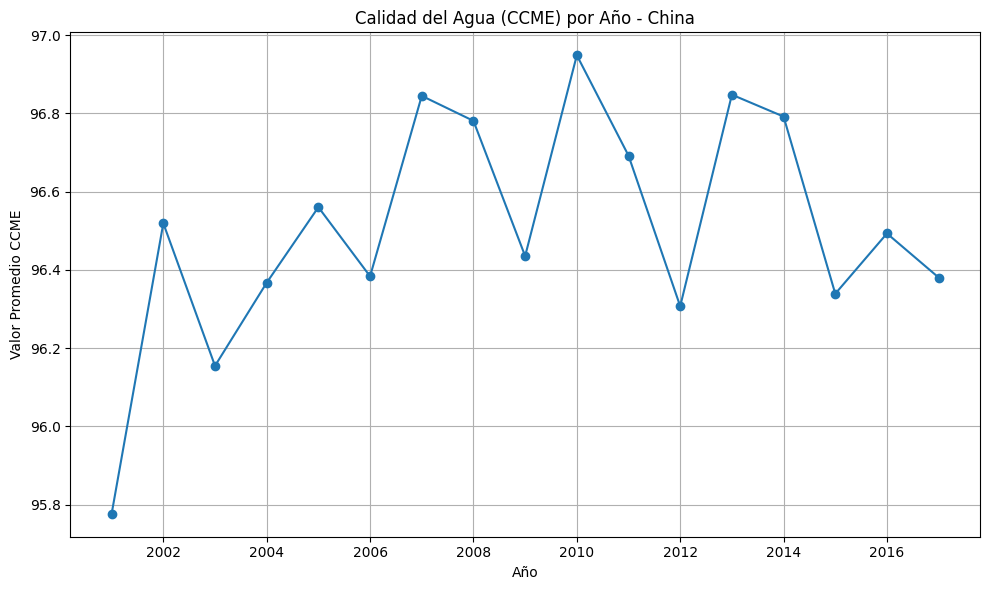

In [48]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
china_df['Date'] = pd.to_datetime(china_df['Date'], format="%d-%m-%Y", errors='coerce')

# Extract the year
china_df['Year'] = china_df['Date'].dt.year

# Group by year and calculate the mean CCME_Values
yearly_quality = china_df.groupby('Year')['CCME_Values'].mean().dropna()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_quality.index, yearly_quality.values, marker='o')
plt.title('Calidad del Agua (CCME) por Año - China')
plt.xlabel('Año')
plt.ylabel('Valor Promedio CCME')
plt.grid(True)
plt.tight_layout()
plt.show()


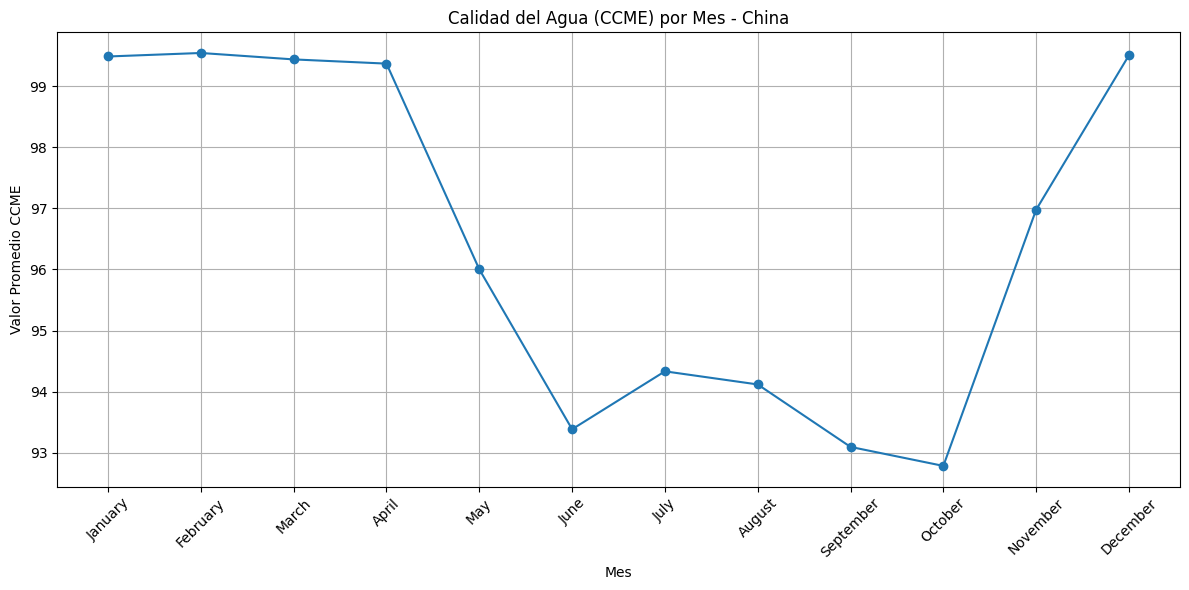

In [49]:
# Επαναφόρτωση του αρχείου China μετά το ανέβασμα
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
china_df = pd.read_csv('data/China_dataset.csv')
china_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in china_df.columns]

# Μετατροπή ημερομηνίας σε datetime
china_df['date'] = pd.to_datetime(china_df['date'], format="%d-%m-%Y", errors='coerce')

# Εξαγωγή ονόματος μήνα
china_df['month'] = china_df['date'].dt.month_name()

# Ομαδοποίηση κατά μήνα και υπολογισμός μέσου όρου CCME_Values
monthly_quality = china_df.groupby('month')['ccme_values'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Γράφημα
plt.figure(figsize=(12, 6))
plt.plot(monthly_quality.index, monthly_quality.values, marker='o')
plt.title('Calidad del Agua (CCME) por Mes - China')
plt.xlabel('Mes')
plt.ylabel('Valor Promedio CCME')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
from statsmodels.tsa.stattools import adfuller

china_df = pd.read_csv('data/China_dataset.csv')
china_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in china_df.columns]
china_df['date'] = pd.to_datetime(china_df['date'], format="%d-%m-%Y", errors='coerce')
china_df['month_year'] = china_df['date'].dt.to_period('M')

china_ts = china_df.groupby('month_year')['ccme_values'].mean().dropna()
china_ts.index = china_ts.index.to_timestamp()

adf_result = adfuller(china_ts)
adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Critical Values": adf_result[4],
    "Stationary": adf_result[1] < 0.05
}

adf_output


{'ADF Statistic': -3.658282231828894,
 'p-value': 0.004739721703098405,
 'Critical Values': {'1%': -3.4648754262570978,
  '5%': -2.876714157488788,
  '10%': -2.574858699001736},
 'Stationary': True}

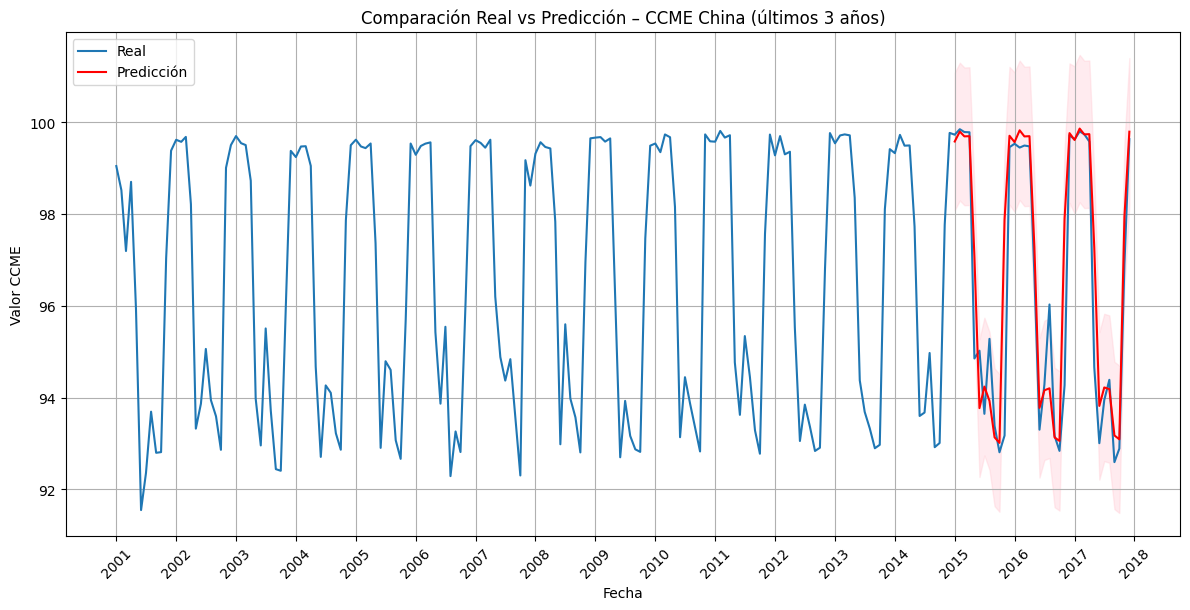

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Cargar el archivo CSV
china_df = pd.read_csv('data/China_dataset.csv')

# Limpiar nombres de columnas
china_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in china_df.columns]

# Convertir columna de fechas a tipo datetime
china_df['date'] = pd.to_datetime(china_df['date'], format="%d-%m-%Y", errors='coerce')
china_df['month_year'] = china_df['date'].dt.to_period('M')

# Ordenar por fecha
china_df = china_df.sort_values('month_year')

# Crear serie temporal: promedio de valores CCME por mes
china_ts = china_df.groupby('month_year')['ccme_values'].mean().dropna()

# Separar en conjunto de entrenamiento y prueba (últimos 3 años = 36 meses)
cutoff = china_ts.index[-36]
train_ts = china_ts[china_ts.index < cutoff]
test_ts = china_ts[china_ts.index >= cutoff]

# Ajustar modelo SARIMAX
model = sm.tsa.SARIMAX(train_ts, order=(1,1,1), seasonal_order=(1,1,1,12),
                       enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Obtener predicciones para el conjunto de prueba
pred = results.get_prediction(start=test_ts.index[0], end=test_ts.index[-1])
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# Graficar los valores reales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(china_ts.index.to_timestamp(), china_ts, label='Real')
plt.plot(pred_mean.index.to_timestamp(), pred_mean, color='red', label='Predicción')
plt.fill_between(pred_ci.index.to_timestamp(), pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Comparación Real vs Predicción – CCME China (últimos 3 años)')
plt.xlabel('Fecha')
plt.ylabel('Valor CCME')
plt.legend()
plt.tight_layout()
plt.grid(True)

# ➤ Formatear el eje X para mostrar solo los años
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())            # Mostrar una etiqueta por año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))    # Formato del año: "2020", "2021", etc.
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad

plt.show()


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_ts, pred_mean)
rmse = np.sqrt(mean_squared_error(test_ts, pred_mean))
mape = np.mean(np.abs((test_ts - pred_mean) / test_ts)) * 100  # σε %

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 0.70
RMSE: 1.26
MAPE: 0.74%


In [53]:
from statsmodels.tsa.stattools import adfuller

# Προετοιμασία: κράτησε το ccme_values μαζί με το μηνιαίο στοιχείο
china_df['month'] = china_df['month_year'].dt.month
monthly_stationarity = {}

for month in range(1, 13):
    monthly_data = china_df[china_df['month'] == month].sort_values('month_year')
    series = monthly_data.groupby('month_year')['ccme_values'].mean().dropna()

    if len(series) > 10:  # τουλάχιστον 10 τιμές για στατιστικό νόημα
        result = adfuller(series)
        p_value = result[1]
        monthly_stationarity[month] = p_value
    else:
        monthly_stationarity[month] = None

# Προβολή αποτελεσμάτων
for month, p in monthly_stationarity.items():
    status = "📉 Stationary" if p is not None and p < 0.05 else "📈 Non-stationary or insufficient data"
    print(f"Μήνας {month:02d}: p-value = {p:.4f} -> {status}" if p is not None else f"Μήνας {month:02d}: Δεν υπάρχουν αρκετά δεδομένα")


Μήνας 01: p-value = 0.2246 -> 📈 Non-stationary or insufficient data
Μήνας 02: p-value = 0.0000 -> 📉 Stationary
Μήνας 03: p-value = 0.0000 -> 📉 Stationary
Μήνας 04: p-value = 0.0242 -> 📉 Stationary
Μήνας 05: p-value = 0.0000 -> 📉 Stationary
Μήνας 06: p-value = 0.0002 -> 📉 Stationary
Μήνας 07: p-value = 0.7164 -> 📈 Non-stationary or insufficient data
Μήνας 08: p-value = 0.0002 -> 📉 Stationary
Μήνας 09: p-value = 0.0001 -> 📉 Stationary
Μήνας 10: p-value = 0.0000 -> 📉 Stationary
Μήνας 11: p-value = 0.3126 -> 📈 Non-stationary or insufficient data
Μήνας 12: p-value = 0.8924 -> 📈 Non-stationary or insufficient data


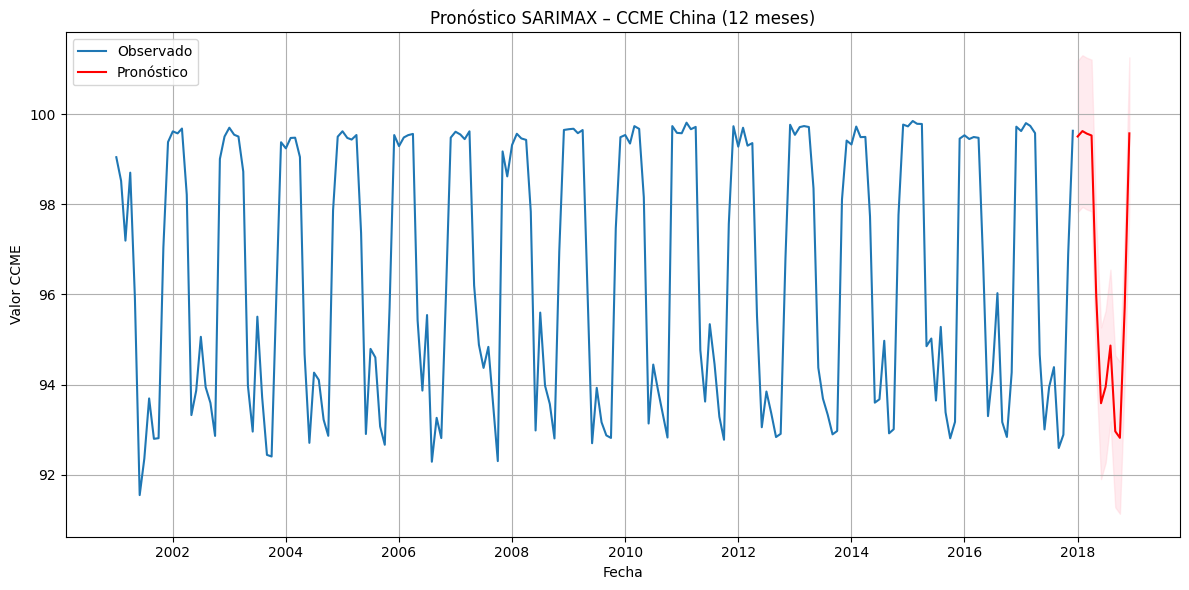

In [54]:
import statsmodels.api as sm

china_ts = china_df.groupby('month_year')['ccme_values'].mean().dropna()
china_ts.index = china_ts.index.to_timestamp()

model = sm.tsa.SARIMAX(china_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=china_ts.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(china_ts.index, china_ts, label='Observado')
plt.plot(forecast_index, forecast_mean, color='red', label='Pronóstico')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Pronóstico SARIMAX – CCME China (12 meses)')
plt.xlabel('Fecha')
plt.ylabel('Valor CCME')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [55]:
# china_df["Waterbody Type"].value_counts()


In [56]:

china_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45997 entries, 0 to 44333
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   country                         45997 non-null  object        
 1   area                            45997 non-null  object        
 2   waterbody_type                  45997 non-null  object        
 3   date                            45997 non-null  datetime64[ns]
 4   ammonia_mg_l                    45997 non-null  float64       
 5   biochemical_oxygen_demand_mg_l  45997 non-null  float64       
 6   dissolved_oxygen_mg_l           45997 non-null  float64       
 7   orthophosphate_mg_l             45997 non-null  float64       
 8   ph_ph_units                     45997 non-null  float64       
 9   temperature_cel                 45997 non-null  float64       
 10  nitrogen_mg_l                   45997 non-null  float64       
 11  nitrate

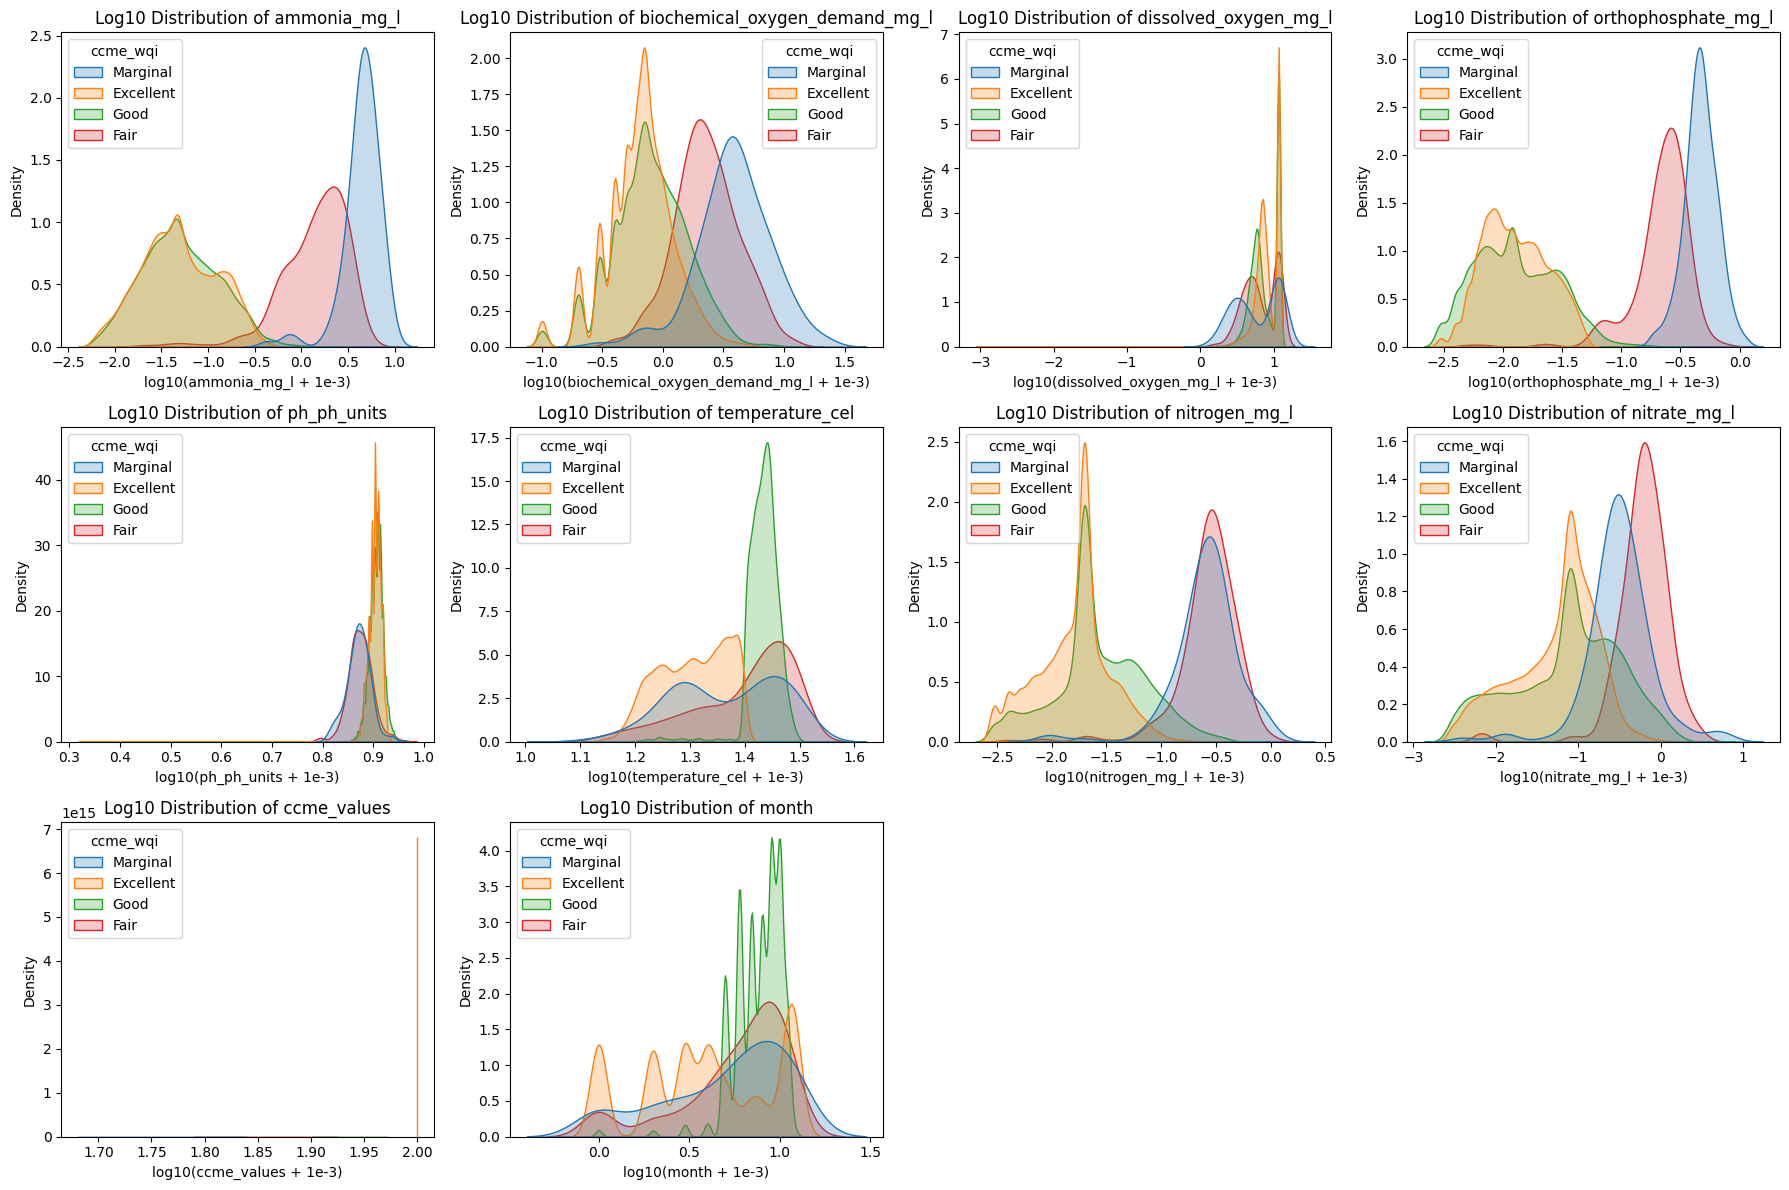

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = china_df.select_dtypes(include='number').columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, start=1):
    # Προσθέτουμε 1e-3 για αποφυγή προβλημάτων με log(0)
    values = china_df[col] + 1e-3
    values = values[values > 0]  # μόνο θετικές τιμές
    if values.empty:
        continue

    plt.subplot(3, 4, i)
    sns.kdeplot(
        x=np.log10(values),
        hue=china_df.loc[values.index, 'ccme_wqi'],
        fill=True,
        warn_singular=False,
        common_norm=False
    )
    plt.title(f'Log10 Distribution of {col}')
    plt.xlabel(f'log10({col} + 1e-3)')
    plt.tight_layout()

plt.show()


In [58]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# numeric_cols = china_df.select_dtypes(include='number').columns

# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numeric_cols, start=1):
#     plt.subplot(3, 3, i)
#     sns.kdeplot(data=china_df, x=col, hue='CCME_WQI', fill=True, warn_singular=False)
#     plt.title(f'Distribution of {col}')
#     plt.tight_layout()


In [59]:
china_df.describe()

,date,ammonia_mg_l,biochemical_oxygen_demand_mg_l,dissolved_oxygen_mg_l,orthophosphate_mg_l,ph_ph_units,temperature_cel,nitrogen_mg_l,nitrate_mg_l,ccme_values,month
count,45997,45997.000000,45997.000000,45997.000000,45997.000000,45997.000000,45997.000000,45997.000000,45997.000000,45997.000000,45997.000000
mean,2009-09-09 16:52:11.891210240,0.100682,0.910625,8.313870,0.018410,8.016912,23.399826,0.032611,0.135646,96.508420,6.479379
min,2001-01-03 00:00:00,0.005000,0.100000,0.000000,0.002000,2.100000,13.000000,0.002000,0.002000,51.076024,1.000000
25%,2005-06-01 00:00:00,0.024000,0.500000,6.000000,0.006000,7.900000,19.800000,0.011000,0.026000,93.182692,3.000000
50%,2009-10-22 00:00:00,0.046000,0.700000,7.600000,0.011000,8.000000,24.200000,0.019000,0.077000,100.000000,6.000000
75%,2014-01-03 00:00:00,0.100000,1.100000,11.684103,0.021000,8.200000,27.000000,0.034000,0.150000,100.000000,9.000000
max,2017-12-16 00:00:00,10.000000,21.000000,16.100000,1.100000,9.300000,33.200000,1.100000,5.900000,100.000000,12.000000
std,NaN,0.321362,0.768164,2.875675,0.035985,0.246474,4.174910,0.049472,0.204973,4.623739,3.451796


(array([  121.,     0.,     0., 25116.,     0.,     0., 20424.,     0.,
            0.,   336.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

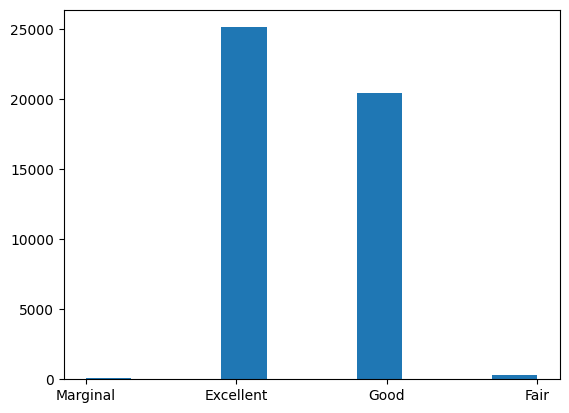

In [60]:
plt.hist(china_df["ccme_wqi"])

(array([1.1000e+01, 3.2000e+01, 9.0000e+01, 1.1000e+02, 1.0100e+02,
        1.1500e+02, 1.0900e+02, 9.1500e+02, 1.9398e+04, 2.5116e+04]),
 array([ 51.07602413,  55.96842171,  60.8608193 ,  65.75321689,
         70.64561448,  75.53801206,  80.43040965,  85.32280724,
         90.21520483,  95.10760241, 100.        ]),
 <BarContainer object of 10 artists>)

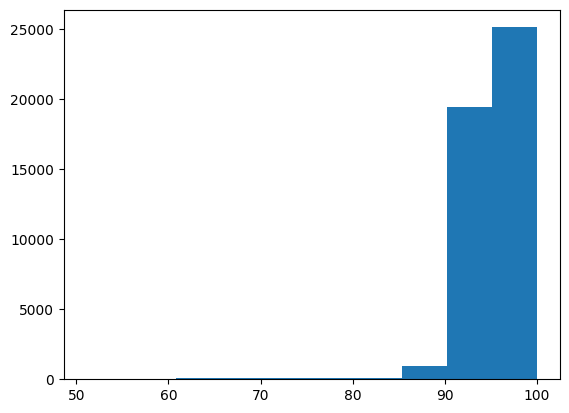

In [61]:
plt.hist(china_df["ccme_values"])




In [62]:
# canada_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in canada_df.columns]
# usa_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in usa_df.columns]
china_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in china_df.columns]



# Define features and target
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

##### Binary - Clasification 


In [63]:

china_df['wqi_binary'] = china_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)

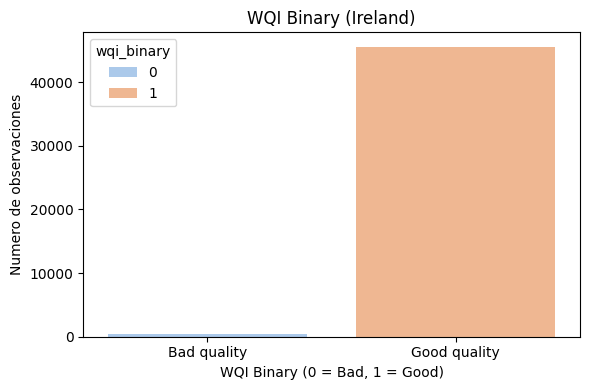

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram (countplot) for the binary target in Canada before prediction
plt.figure(figsize=(6, 4))
# sns.countplot(data=canada_df, x='wqi_binary', palette='pastel',hue='wqi_binary')
# sns.countplot(data=usa_df, x='wqi_binary', palette='pastel',hue='wqi_binary')
sns.countplot(data=china_df, x='wqi_binary', palette='pastel',hue='wqi_binary')

plt.title('WQI Binary (Ireland)')
plt.xlabel('WQI Binary (0 = Bad, 1 = Good)')
plt.ylabel('Numero de observaciones')
plt.xticks([0, 1], ['Bad quality', 'Good quality'])
plt.tight_layout()
plt.show()


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier

# X = canada_df[feature_cols]
# y = canada_df['wqi_binary']

# X = usa_df[feature_cols]
# y = usa_df['wqi_binary']

X = china_df[feature_cols]
y = china_df['wqi_binary']
class_counts = Counter(y)
scale_ratio = class_counts[0] / class_counts[1]
# model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)



model = XGBClassifier(
    scale_pos_weight=scale_ratio,
    eval_metric='logloss',
    random_state=42)



pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

scores.mean(), report, conf_matrix

(0.8809347917230312,
 {'0': {'precision': 0.7165354330708661,
   'recall': 1.0,
   'f1-score': 0.8348623853211009,
   'support': 91.0},
  '1': {'precision': 1.0,
   'recall': 0.9960478647491492,
   'f1-score': 0.998020019799802,
   'support': 9109.0},
  'accuracy': 0.9960869565217392,
  'macro avg': {'precision': 0.8582677165354331,
   'recall': 0.9980239323745745,
   'f1-score': 0.9164412025604515,
   'support': 9200.0},
  'weighted avg': {'precision': 0.9971961656966791,
   'recall': 0.9960869565217392,
   'f1-score': 0.9964061779805018,
   'support': 9200.0}},
 array([[  91,    0],
        [  36, 9073]], dtype=int64))

In [66]:
china_df.head()

,country,area,waterbody_type,date,ammonia_mg_l,biochemical_oxygen_demand_mg_l,dissolved_oxygen_mg_l,orthophosphate_mg_l,ph_ph_units,temperature_cel,nitrogen_mg_l,nitrate_mg_l,ccme_values,ccme_wqi,month_year,month,wqi_binary
0,China,Hou Bay,Bay,2001-01-11,3.500,0.7,8.2,0.400,8.6,17.0,0.210,0.480,63.683885,Marginal,2001-01,1,0
1042,China,Hou Bay,Bay,2001-01-04,0.046,1.9,7.7,0.005,8.2,19.2,0.002,0.004,100.000000,Excellent,2001-01,1,1
1008,China,Hou Bay,Bay,2001-01-04,0.064,0.6,8.6,0.016,8.1,18.7,0.003,0.012,100.000000,Excellent,2001-01,1,1
1007,China,Hou Bay,Bay,2001-01-04,0.050,0.6,8.5,0.009,8.1,18.7,0.007,0.077,100.000000,Excellent,2001-01,1,1
1006,China,Hou Bay,Bay,2001-01-04,0.046,0.5,8.6,0.018,8.1,18.7,0.008,0.076,100.000000,Excellent,2001-01,1,1


#### Multi - Clasificacion 

In [67]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

y_multi = china_df['ccme_wqi']
X = china_df[feature_cols]

# Orden de categorias
quality_order = [['Marginal', 'Fair', 'Good', 'Excellent']]
oe = OrdinalEncoder(categories=quality_order)

y_array = np.array(y_multi).reshape(-1, 1)
y_encoded = oe.fit_transform(y_array).ravel()

# Modelos 
model = XGBClassifier(random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)

#  Pipeline 
pipeline_multi = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_multi, X, y_encoded, cv=cv, scoring='f1_macro')

print("Cross-validated F1-macro scores:", scores)
print("Average F1-macro:", np.mean(scores))

# Cross-validated predictions for classification report 
y_pred_cv = cross_val_predict(pipeline_multi, X, y_encoded, cv=cv)

#  Inverse transform 
y_pred_labels_cv = oe.inverse_transform(y_pred_cv.reshape(-1, 1)).ravel()
y_true_labels_cv = oe.inverse_transform(y_encoded.reshape(-1, 1)).ravel()

labels_order = ['Marginal', 'Fair', 'Good', 'Excellent']
print(classification_report(
    y_true_labels_cv,
    y_pred_labels_cv,
    labels=labels_order,
    target_names=labels_order
))


Cross-validated F1-macro scores: [0.94780516 0.94219107 0.9745183  0.96450109 0.97139814]
Average F1-macro: 0.9600827517211566
              precision    recall  f1-score   support

    Marginal       0.90      0.95      0.92       121
        Fair       0.89      0.95      0.92       336
        Good       1.00      1.00      1.00     20424
   Excellent       1.00      1.00      1.00     25116

    accuracy                           1.00     45997
   macro avg       0.95      0.97      0.96     45997
weighted avg       1.00      1.00      1.00     45997



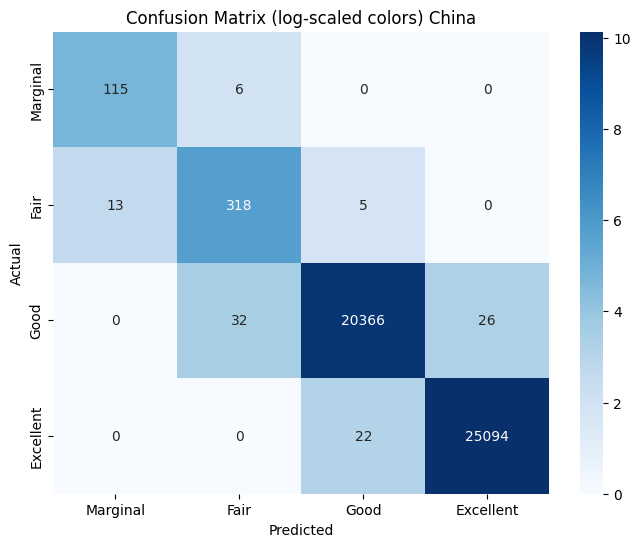

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion Matrix 
cm = confusion_matrix(y_true_labels_cv, y_pred_labels_cv, labels=labels_order)

plt.figure(figsize=(8, 6))
sns.heatmap(
    np.log1p(cm),  # log(1 + x) por evitar log(0)
    annot=cm,
    fmt='d',
    cmap='Blues',
    xticklabels=labels_order,
    yticklabels=labels_order
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (log-scaled colors) China')
plt.show()


In [69]:
# Feature Importance (fit)
pipeline_multi.fit(X, y_encoded)
xgb_model = pipeline_multi.named_steps['classifier']

importances = xgb_model.feature_importances_

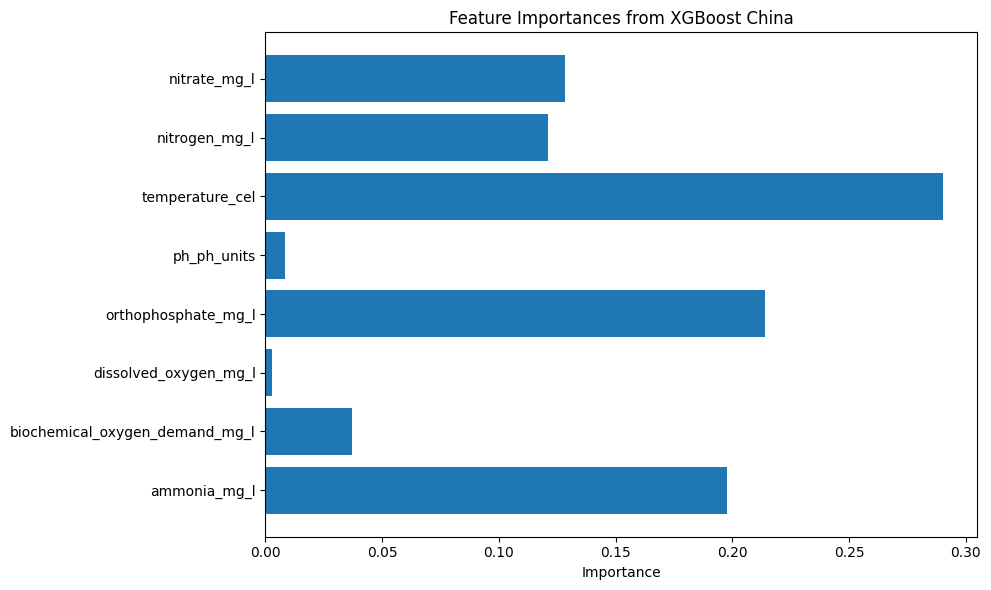

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost China')
plt.tight_layout()
plt.show()

In [71]:
# Predict probabilities for class 0 (Bad water)
y_proba = pipeline.predict_proba(X_test)[:, 0]

# Create alert levels
X_test_alerts = X_test.copy()
X_test_alerts['proba_bad'] = y_proba
X_test_alerts['true_label'] = y_test.values
X_test_alerts['alert_level'] = pd.cut(
    y_proba,
    bins=[0, 0.4, 0.7, 1],
    labels=['Safe', 'Moderate Risk', 'High Risk']
)

# Return top 10 risk cases
X_test_alerts[['proba_bad', 'true_label', 'alert_level']].sort_values(by='proba_bad', ascending=False)


,proba_bad,true_label,alert_level
5208,9.999995e-01,0,High Risk
28710,9.999995e-01,0,High Risk
2600,9.999995e-01,0,High Risk
7802,9.999995e-01,0,High Risk
5196,9.999995e-01,0,High Risk
...,...,...,...
45554,9.536743e-07,1,Safe
97,9.536743e-07,1,Safe
8180,9.536743e-07,1,Safe
20380,9.536743e-07,1,Safe


### Regresion 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Datos
X = china_df[feature_cols]
y = china_df['ccme_values']

# 2. modelos
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1
)

# 3. Pipeline
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)
])

# 4. Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit & Predict
reg_pipeline.fit(X_train_r, y_train_r)
y_pred_r = reg_pipeline.predict(X_test_r)

mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print("=== Test Set Metrics ===")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

=== Test Set Metrics ===
MAE: 0.008
RMSE: 0.125
R²: 0.999


In [73]:
# 7. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# R²
cv_r2_scores = cross_val_score(reg_pipeline, X, y, cv=cv, scoring='r2')
print("\n=== Cross-Validated R² Scores ===")
print(np.round(cv_r2_scores, 3))
print("Average R²:", np.mean(cv_r2_scores).round(3))

# MAE (-score)
cv_mae_scores = -cross_val_score(reg_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
print("\n=== Cross-Validated MAE Scores ===")
print(np.round(cv_mae_scores, 3))
print("Average MAE:", np.mean(cv_mae_scores).round(3))


=== Cross-Validated R² Scores ===
[0.999 0.999 0.999 0.999 0.999]
Average R²: 0.999

=== Cross-Validated MAE Scores ===
[0.008 0.011 0.009 0.009 0.01 ]
Average MAE: 0.009


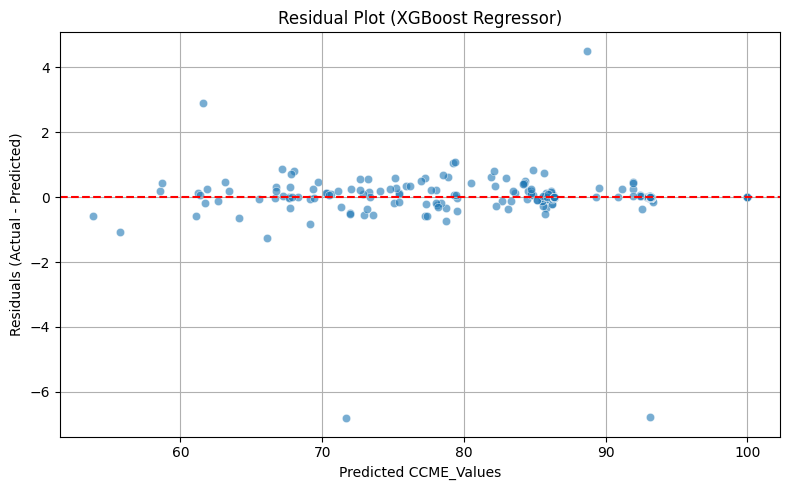

In [74]:
# residuals
residuals = y_test_r - y_pred_r

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_r, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CCME_Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (XGBoost Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()


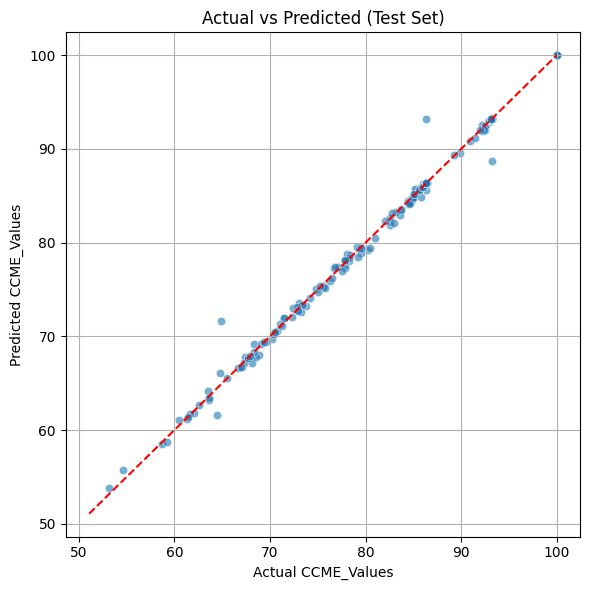

In [75]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual CCME_Values')
plt.ylabel('Predicted CCME_Values')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

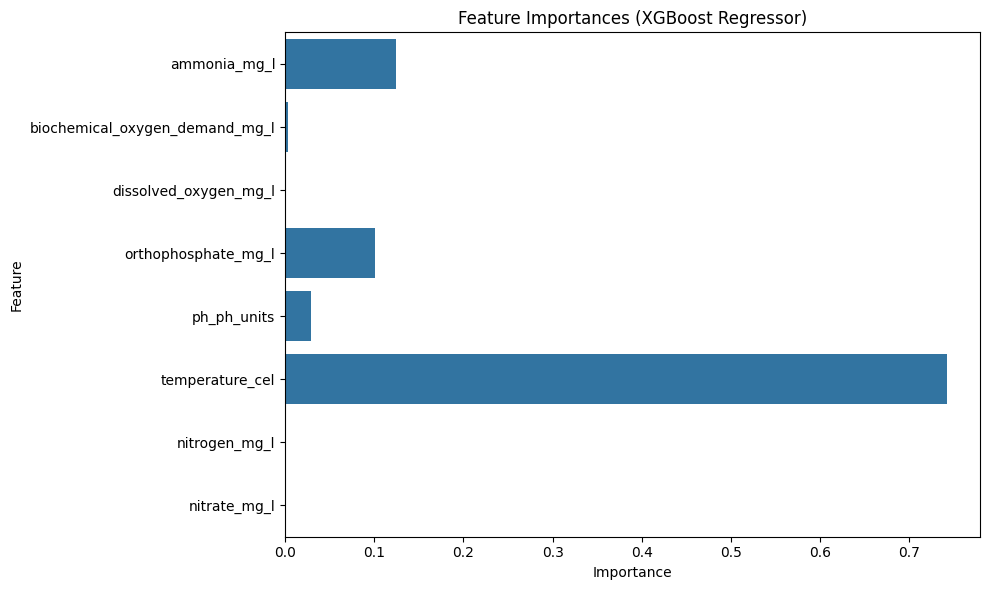

In [76]:
# feature importance xgb modelo de pipeline
xgb_model = reg_pipeline.named_steps['regressor']
importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances (XGBoost Regressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### Clustering

##### Dissolved oxygen: Warm water holds less oxygen.

Chemical reactions: Higher temps can accelerate pollutant breakdown (or worsen toxicity).

Biological activity: Promotes algae blooms or bacterial growth.
Fish have optimal temperature ranges.

In [77]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

X = china_df[feature_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []


Shape de X_scaled: (45997, 8)
🔹 Mejor número de clusters según Silhouette Score:
k                3.000000
silhouette       0.458909
inertia       1307.638427
Name: 1, dtype: float64


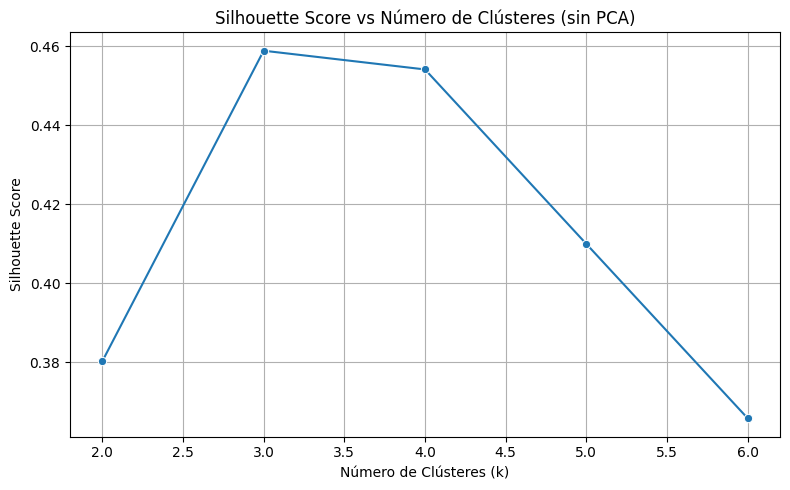

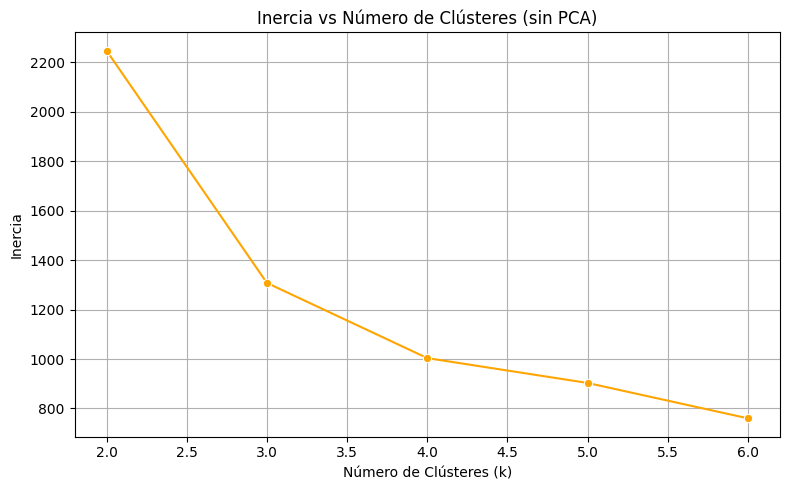

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Verifica que X_scaled ya esté definido (con tus datos normalizados)
print("Shape de X_scaled:", X_scaled.shape)

# Rango de valores de k
k_range = range(2, 7)

# Guardar resultados
results = []

# Tamaño de muestra para silhouette (mejor rendimiento)
sample_size = 50000

# Bucle para distintos valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    silhouette = silhouette_score(X_scaled, labels, sample_size=sample_size, random_state=42)
    inertia = kmeans.inertia_

    results.append({
        'k': k,
        'silhouette': silhouette,
        'inertia': inertia
    })

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Mostrar la mejor combinación
best_result = results_df.loc[results_df['silhouette'].idxmax()]
print("🔹 Mejor número de clusters según Silhouette Score:")
print(best_result)

# Visualización: Silhouette Score
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_df, x='k', y='silhouette', marker='o')
plt.title("Silhouette Score vs Número de Clústeres (sin PCA)")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización: Inertia
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_df, x='k', y='inertia', marker='o', color='orange')
plt.title("Inercia vs Número de Clústeres (sin PCA)")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === 1. Προετοιμασία Δεδομένων ===
# feature_cols = [
#     'ammonia_mg_l',
#     'biochemical_oxygen_demand_mg_l',
#     'dissolved_oxygen_mg_l',
#     'orthophosphate_mg_l',
#     'ph_ph_units',
#     'temperature_cel',
#     'nitrogen_mg_l',
#     'nitrate_mg_l'
# ]

# X = china_df[feature_cols]
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # === 3. KMeans on PCA ===
# kmeans = KMeans(n_clusters=4, random_state=42)
# kmeans_labels = kmeans.fit_predict(Χ_scaled)
# sil_kmeans = silhouette_score(Χ_scaled, kmeans_labels)

# # === 4. GMM on PCA ===
# gmm = GaussianMixture(n_components=3, random_state=42)
# gmm_labels = gmm.fit_predict(Χ_scaled)
# sil_gmm = silhouette_score(Χ_scaled, gmm_labels)

# # === 6. Σύγκριση Silhouette Scores ===
# print("🔎 Silhouette Scores:")
# print(f"KMeans  (PCA):  {sil_kmeans:.3f}")
# print(f"GMM     (PCA):  {sil_gmm:.3f}")

# # === 7. Οπτικοποίηση ===
# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# # KMeans
# sns.scatterplot(x=Χ_scaled[:, 0], y=Χ_scaled[:, 1], hue=kmeans_labels, palette='tab10', ax=axes[0])
# axes[0].set_title(f'KMeans (Silhouette: {sil_kmeans:.3f})')

# # GMM
# sns.scatterplot(x=Χ_scaled[:, 0], y=Χ_scaled[:, 1], hue=gmm_labels, palette='tab10', ax=axes[1])
# axes[1].set_title(f'GMM (Silhouette: {sil_gmm:.3f})')

# for ax in axes:
#     ax.set_xlabel("PCA Component 1")
#     ax.set_ylabel("PCA Component 2")
#     ax.legend(title="Cluster", loc='best')

# plt.tight_layout()
# plt.show()


In [95]:
# k_optimo = int(best_result['k'])
k_optimo = 4 
# Entrenar con todo el X_scaled (100K)
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
clusters_final = kmeans_final.fit_predict(X_scaled)

# Añadir etiquetas al DataFrame original
china_df['Cluster'] = clusters_final


In [96]:
feature_cols = [
    'ammonia_mg_l', 'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l', 'orthophosphate_mg_l',
    'ph_ph_units', 'temperature_cel',
    'nitrogen_mg_l', 'nitrate_mg_l'
]


cluster_summary = china_df.groupby('Cluster')[feature_cols].mean().round(2)
print("📊 Medias por variable en cada clúster:")
print(cluster_summary)

📊 Medias por variable en cada clúster:
         ammonia_mg_l  biochemical_oxygen_demand_mg_l  dissolved_oxygen_mg_l  \
Cluster                                                                        
0                0.09                            1.05                  11.46   
1                0.11                            0.85                   7.13   
2                0.10                            0.89                   5.50   
3                0.11                            0.84                  11.59   

         orthophosphate_mg_l  ph_ph_units  temperature_cel  nitrogen_mg_l  \
Cluster                                                                     
0                       0.02         8.04            26.66           0.04   
1                       0.02         8.00            18.81           0.02   
2                       0.02         8.02            26.26           0.04   
3                       0.02         8.00            19.32           0.02   

         nitrate_

In [97]:
distribution = pd.crosstab(china_df['Cluster'], china_df['waterbody_type'], normalize='index') * 100
print("Distribución (%) de tipos de cuerpos de agua por clúster:")
print(distribution.round(1))


Distribución (%) de tipos de cuerpos de agua por clúster:
waterbody_type    Bay
Cluster              
0               100.0
1               100.0
2               100.0
3               100.0


In [98]:
# Asegúrate de tener la columna con el nombre correcto
print("Columnas disponibles:", china_df.columns)

# Supongamos que la columna ya está en minúsculas y limpia como 'ccme_values'
ccme_summary = china_df.groupby('Cluster')['ccme_values'].agg(['mean', 'median', 'min', 'max', 'count']).round(2)

print(" Estadísticas de calidad del agua (CCME Values) por clúster:")
print(ccme_summary)


Columnas disponibles: Index(['country', 'area', 'waterbody_type', 'date', 'ammonia_mg_l',
       'biochemical_oxygen_demand_mg_l', 'dissolved_oxygen_mg_l',
       'orthophosphate_mg_l', 'ph_ph_units', 'temperature_cel',
       'nitrogen_mg_l', 'nitrate_mg_l', 'ccme_values', 'ccme_wqi',
       'month_year', 'month', 'wqi_binary', 'Cluster'],
      dtype='object')
 Estadísticas de calidad del agua (CCME Values) por clúster:
          mean  median    min    max  count
Cluster                                    
0        94.12   93.19  51.08  100.0  11035
1        99.57  100.00  55.14  100.0  11380
2        94.61   93.19  51.38  100.0  16193
3        99.52  100.00  55.39  100.0   7389
